# CAU Computer Vision - Project 1

### import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cv2_imshow(name: str, src):
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(name, 800, 800)
    cv2.moveWindow(name, 500, 100)

    cv2.imshow(name, src)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Click and get patch for 1st.jpg
### Get coordinate

In [3]:
coord1 = []

def getCoord_1(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coord1.append((y,x))
        print(x, y)

In [4]:
image1 = cv2.imread("1st.jpg")

cv2.namedWindow("1st", cv2.WINDOW_NORMAL)
cv2.resizeWindow("1st", 800, 800)
cv2.moveWindow("1st", 500, 100)
cv2.setMouseCallback("1st", getCoord_1)

cv2.imshow("1st", image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(coord1)

140 1890
1750 3588
2824 2424
1463 897
[(1890, 140), (3588, 1750), (2424, 2824), (897, 1463)]


### Make patch for each clicked points

In [17]:
patch_size = 4
patch1 = [image1[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]

### Show patches of 1st.jpg

In [19]:
for i in range(len(patch1)):
    wname = "1st_" + str(i)
    cv2_imshow(wname, patch1[i])

## Click and get patch for 2st.jpg
### Get coordinate

In [7]:
coord2 = []

def getCoord_2(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coord2.append((y,x))
        print(x, y)

In [8]:
image2 = cv2.imread("2nd.jpg")

cv2.namedWindow("2nd", cv2.WINDOW_NORMAL)
cv2.resizeWindow("2nd", 800, 800)
cv2.moveWindow("2nd", 500, 100)
cv2.setMouseCallback("2nd", getCoord_2)

cv2.imshow("2nd", image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(coord2)

559 1452
741 3074
2487 3342
2570 1734
[(1452, 559), (3074, 741), (3342, 2487), (1734, 2570)]


### Make patch for each clicked points

In [9]:
patch_size = 4
patch2 = [image2[coord2[i][0]-patch_size:coord2[i][0]+patch_size+1, coord2[i][1]-patch_size:coord2[i][1]+patch_size+1] for i in range(len(coord2))]

### Show patches of 2nd.jpg

In [20]:
for i in range(len(patch2)):
    wname = "2nd_" + str(i)
    cv2_imshow(wname, patch2[i])

## Histograms

In [11]:
hist_bin = 32

### (1) Gradient Histogram

In [12]:
def norm_gradient(src):
    
    x_forward = np.concatenate([src[:, 1:], src[:, -1:]], axis = 1)
    x_backward = np.concatenate([src[:, :1], src[:, :-1]], axis = 1)
    Dx = np.subtract(x_forward, x_backward)/2

    y_forward = np.concatenate([src[1:, :], src[-1:, :]])
    y_backward = np.concatenate([src[:1, :], src[:-1, :]])
    Dy = np.subtract(y_forward, y_backward)/2

    norm_gradient = np.sqrt(np.add(np.square(Dx), np.square(Dy)))
    norm_gradient = np.uint8(np.around(norm_gradient))
    
    return norm_gradient

In [13]:
def gradient_histogram(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        src = cv2.cvtColor(src_list[i], cv2.COLOR_BGR2GRAY)
        grd = norm_gradient(src)
        hist = cv2.calcHist([grd], [0], None, [int(256/hist_bin)], [0, 360])
        hist_list.append(hist)
        plt.plot(hist)
        plt.show()

*** 1st.jpg ****
- 1th -


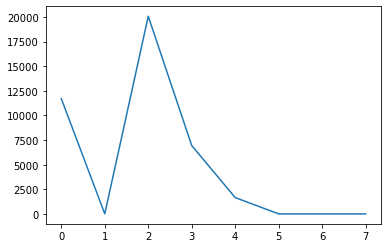

- 2th -


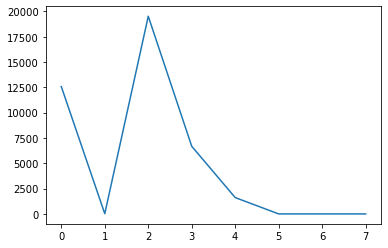

- 3th -


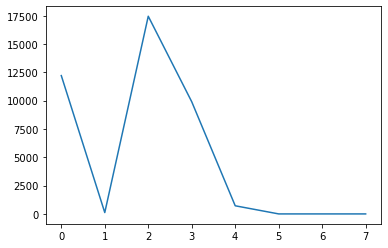

- 4th -


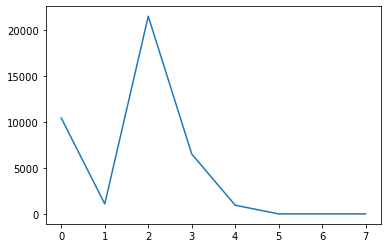

*** 2nd.jpg ****
- 1th -


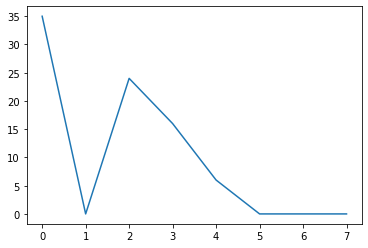

- 2th -


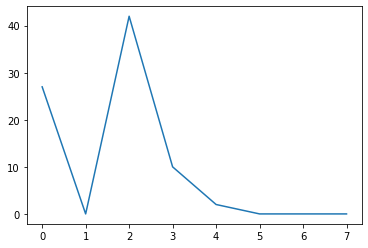

- 3th -


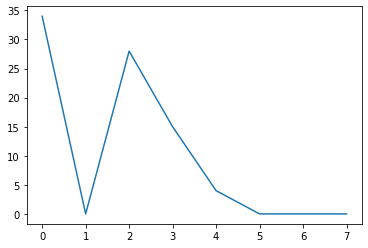

- 4th -


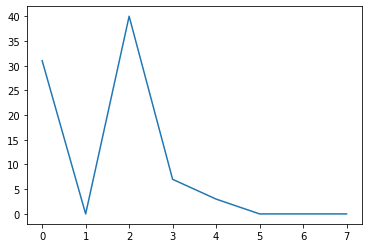

In [14]:
print("*** 1st.jpg ****")
hist_list_1st = gradient_histogram(patch1)

print("*** 2nd.jpg ****")
hist_list_1st = gradient_histogram(patch2)

### (2) Brightness Histogram

## Click and get patch for 1st.jpg
### Get coordinate

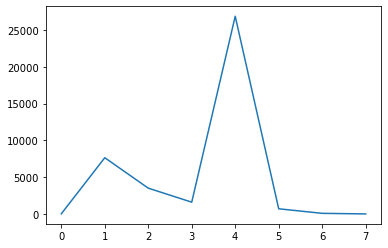

In [15]:
src = cv2.cvtColor(patch1[0], cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([src], [0], None, [int(256/hist_bin)], [0, 256])
plt.plot(hist)
plt.show()


### (3) Color Histogram

In [16]:
print("hello")

hello
